# Notebook 31: Faults and stress magnitudes

Three lines of evidence indicate that in many places the crust is in a state of *frictional equilibrium*. This means that the frictional resistive forces on existing faults and the tectonic and other forces are balanced ([Ragan, 2009](https://www.cambridge.org/core/books/structural-geology/4D631885C9FBBCDEF90C555445ED1160), [Townend and Zoback, 2000](https://pubs.geoscienceworld.org/gsa/geology/article/28/5/399/188505/How-faulting-keeps-the-crust-strong)):

1. Seismicity induced by reservoir impoundment or fluid injection. 
2. Earthquakes triggered by other earthquakes.
3. The measured stress in the upper crust is consistent with the Coulomb criterion and measured frictional coefficients ([Byerlee, 1978](https://link.springer.com/article/10.1007/BF00876528)).

In this notebook, we will get some feeling for the magnitudes of the principals stresses under conditions of frictional equilibrium (section 10.9 of [Ragan, 2009](https://www.cambridge.org/core/books/structural-geology/4D631885C9FBBCDEF90C555445ED1160)). To do this, we will use the functions in the module [failure_envelope](../functions/failure_envelope.py).

## Normal faults

For a normal fault, $\sigma_1$ is vertical. Suppose the gradient of the vertical stress is 24 MPa/km and $\phi_s = 30$°. Estimate the differential stress required for renewed slip at 1, 2, 3, 4, 5 and 6 km depth:

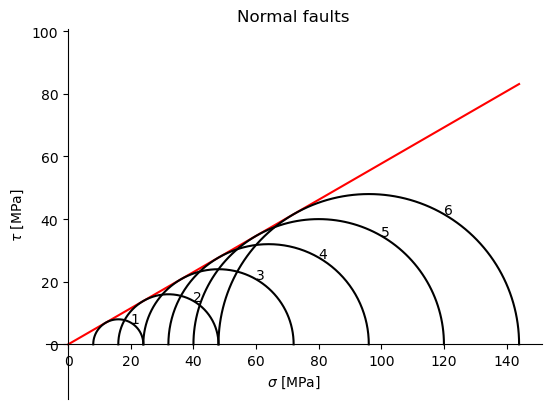

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# this makes visible our functions folder
import sys, os
sys.path.append(os.path.abspath(os.path.join("..", "functions")))

# import functions 
from failure_envelope import sigma_3_optimal, sigma_1_optimal
# import class
from Circle import Circle

# define the parameters
depths = np.arange(1, 7) # depths in km
sigma_v_grad = 24 # gradient of vertical stress in MPa/km
sigma_1 = depths * sigma_v_grad # sigma_1 in MPa
phi_s = np.radians(30) # static friction angle in radians

# create the figure
fig, ax = plt.subplots()

# plot the failure envelope
x_e = np.array([0, sigma_1[-1]])
y_fe = np.tan(phi_s)*x_e # friction envelope
ax.plot(x_e, y_fe, "r-")

# plot the Mohr circles
for i in range(len(depths)):
    # create the circle
    sigma_3 = sigma_3_optimal(sigma_1[i], phi_s, 0)
    center = (sigma_1[i] + sigma_3) / 2
    radius = (sigma_1[i] - sigma_3) / 2
    circle = Circle([center, 0], radius)
    x , y = circle.coordinates(0, np.radians(180))
    # plot the circle
    ax.plot(x, y, "k-")
    xl , yl = circle.coordinates_at_angle(np.radians(60))
    ax.text(xl, yl, f"{depths[i]}")

# axes labels
ax.set_xlabel(r"$\sigma$ [MPa]")
ax.set_ylabel(r"$\tau$ [MPa]")
# axes equal
ax.axis("equal")
# move axes to zero
ax.spines["bottom"].set_position("zero")
ax.spines["left"].set_position("zero")
# remove right and top spines
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
# add title
ax.set_title("Normal faults")

plt.show()

## Thrust faults

For thrust faults, $\sigma_3$ is vertical. Let's repeat the analysis before:

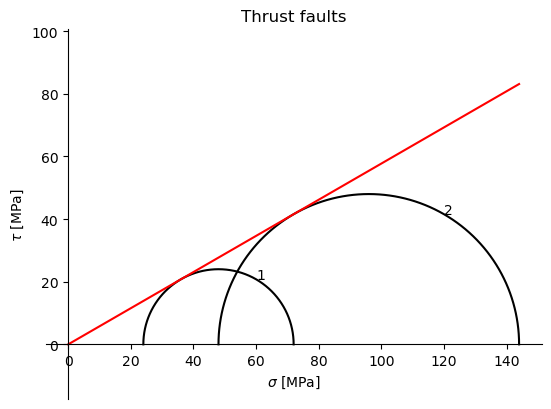

In [2]:
# sigma_3
sigma_3 = depths * sigma_v_grad # sigma_3 in MPa

# create the figure
fig, ax = plt.subplots()

# plot the Mohr circles
for i in range(2): # let's just do the first 2 km
    # create the circle
    sigma_1 = sigma_1_optimal(sigma_3[i], phi_s, 0)
    center = (sigma_1 + sigma_3[i]) / 2
    radius = (sigma_1 - sigma_3[i]) / 2
    circle = Circle([center, 0], radius)
    x , y = circle.coordinates(0, np.radians(180))
    # plot the circle
    ax.plot(x, y, "k-")
    xl , yl = circle.coordinates_at_angle(np.radians(60))
    ax.text(xl, yl, f"{depths[i]}")

# plot the failure envelope
ax.plot(x_e, y_fe, "r-")

# axes labels
ax.set_xlabel(r"$\sigma$ [MPa]")
ax.set_ylabel(r"$\tau$ [MPa]")
# axes equal
ax.axis("equal")
# move axes to zero
ax.spines["bottom"].set_position("zero")
ax.spines["left"].set_position("zero")
# remove right and top spines
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
# add title
ax.set_title("Thrust faults")

plt.show()

As you can see, the differential stress required for renewed thrust movement is much higher than for normal faults.

## Strike-slip faults

For strike-slip faults, $\sigma_2$ is vertical, and there is a range of possibilities. We can express the relative value of $\sigma_2$ by using:

$$
K=\frac{\sigma_2-\sigma_3}{\sigma_1-\sigma_3}
$$

Thus if $\sigma_2 = \sigma_3$, $K=0$ and if $\sigma_2=\sigma_1$, $K=1$. Let's assume $K = 0.5$. In this case, $\sigma_2$ is the center of the Mohr Circle:

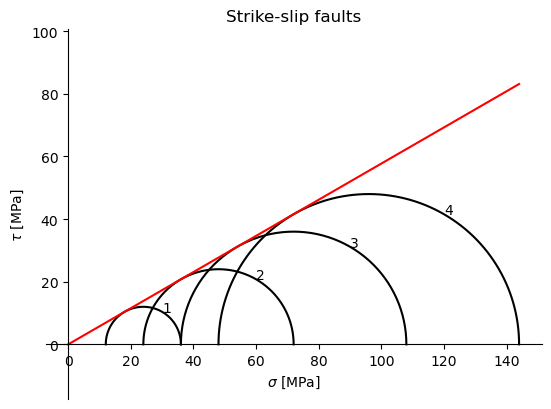

In [3]:
# sigma_2
sigma_2 = depths * sigma_v_grad # sigma_2 in MPa

# create the figure
fig, ax = plt.subplots()

# plot the Mohr circles
for i in range(4): # let's just do the first 4 km
    # create the circle
    center = sigma_2[i] # K = 0.5, sigma_2 = center
    radius = center * np.sin(phi_s)
    circle = Circle([center, 0], radius)
    x , y = circle.coordinates(0, np.radians(180))
    # plot the circle
    ax.plot(x, y, "k-")
    xl , yl = circle.coordinates_at_angle(np.radians(60))
    ax.text(xl, yl, f"{depths[i]}")

# plot the failure envelope
ax.plot(x_e, y_fe, "r-")

# axes labels
ax.set_xlabel(r"$\sigma$ [MPa]")
ax.set_ylabel(r"$\tau$ [MPa]")
# axes equal
ax.axis("equal")
# move axes to zero
ax.spines["bottom"].set_position("zero")
ax.spines["left"].set_position("zero")
# remove right and top spines
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
# add title
ax.set_title("Strike-slip faults")

plt.show()

These results show that the resistance to slip increases with depth for all three types of faults, and that at any given depth it is the least for normal faults and the greatest for thrust faults.

We have not included here the role of fluid pore pressures. Section 10.9 of [Ragan, 2009](https://www.cambridge.org/core/books/structural-geology/4D631885C9FBBCDEF90C555445ED1160) discusses that.